-------------------------------------------------

##**<center>PROYECTO FINAL: GOOGLE & YELP<center>**

-------------------------------------------------

## **Datos de la la plataforma Yelp**
----

In [ ]:
# Importar librerias
from google.colab import drive
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# Establecer conexión con google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Guardar rutas en variables
# CAMBIAR RUTA EN BASE A LA UBICACION DE LOS DATOS
ruta1='/content/drive/MyDrive/Proyecto Final/Yelp/business.pkl'
ruta2='/content/drive/MyDrive/Proyecto Final/Yelp/checkin.json'
ruta3='/content/drive/MyDrive/Proyecto Final/Yelp/review.json'
ruta4='/content/drive/MyDrive/Proyecto Final/Yelp/tip.json'
ruta5='/content/drive/MyDrive/Proyecto Final/Yelp/user.parquet'


### *Lectura de datos del archivo "business"*
---

In [ ]:
# Leer archivo "business"
business=pd.read_pickle(ruta1)
parte_nula=business.iloc[:,14:].tail()
parte_nula.dropna(how='all')
business=business.iloc[:,:14]
business
# OBSERVACIONES GENERALES
  # La tabla contiene columnas duplicadas, dichas columnas estan todas vacias
  # La tabla contiene columnas duplicadas, dichas columnas estan todas vacias
  # Sin registros duplicados
  # Campos con valores nulos-->  "attribut"--13744 / "categories"--103 / "hours"-- 23223
  # Columnas candidatas a ser eliminadas--> "is_open" - no aporta información reelevantes para nuestro analisis
  #  # Tipo incorrecto: "latitude" - "Longitude" - "stars" - "review_count"


business_id                      name  \
0       Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1       mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2       tUFrWirKiKi_TAnsVWINQQ                    Target   
3       MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4       mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   
...                        ...                       ...   
150341  IUQopTMmYQG-qRtBk-8QnA              Binh's Nails   
150342  c8GjPIOTGVmIemT7j5_SyQ      Wild Birds Unlimited   
150343  _QAMST-NrQobXduilWEqSw         Claire's Boutique   
150344  mtGm22y5c2UHNXDFAjaPNw  Cyclery & Fitness Center   
150345  jV_XOycEzSlTx-65W906pg                   Sic Ink   

                                address           city state postal_code  \
0                1616 Chapala St, Ste 2  Santa Barbara   NaN       93101   
1       87 Grasso Plaza Shopping Center         Affton   NaN       63123   
2                  5255 E Broadway Blvd         Tucson   NaN       85711   
3                           935 Race St   Philadelphia    CA       19107   
4                         101 Walnut St     Green Lane    MO       18054   
...                                 ...            ...   ...         ...   
150341                3388 Gateway Blvd       Edmonton    IN     T6J 5H2   
150342               2813 Bransford Ave      Nashville    DE       37204   
150343           6020 E 82nd St, Ste 46   Indianapolis    AB       46250   
150344                     2472 Troy Rd   Edwardsville    AB       62025   
150345            238 Apollo Beach Blvd   Apollo beach    TN       33572   

         latitude   longitude stars review_count is_open  \
0       34.426679 -119.711197   5.0            7       0   
1       38.551126  -90.335695   3.0           15       1   
2       32.223236 -110.880452   3.5           22       0   
3       39.955505  -75.155564   4.0           80       1   
4       40.338183  -75.471659   4.5           13       1   
...           ...         ...   ...          ...     ...   
150341  53.468419 -113.492054   3.0           13       1   
150342  36.115118  -86.766925   4.0            5       1   
150343  39.908707  -86.065088   3.5            8       1   
150344  38.782351  -89.950558   4.0           24       1   
150345  27.771002   -82.39491   4.5            9       1   

                                               attributes  \
0                           {'ByAppointmentOnly': 'True'}   
1                  {'BusinessAcceptsCreditCards': 'True'}   
2       {'BikeParking': 'True', 'BusinessAcceptsCredit...   
3       {'RestaurantsDelivery': 'False', 'OutdoorSeati...   
4       {'BusinessAcceptsCreditCards': 'True', 'Wheelc...   
...                                                   ...   
150341  {'ByAppointmentOnly': 'False', 'RestaurantsPri...   
150342  {'BusinessAcceptsCreditCards': 'True', 'Restau...   
150343  {'RestaurantsPriceRange2': '1', 'BusinessAccep...   
150344  {'BusinessParking': '{'garage': False, 'street...   
150345  {'WheelchairAccessible': 'True', 'BusinessAcce...   

                                               categories  \
0       Doctors, Traditional Chinese Medicine, Naturop...   
1       Shipping Centers, Local Services, Notaries, Ma...   
2       Department Stores, Shopping, Fashion, Home & G...   
3       Restaurants, Food, Bubble Tea, Coffee & Tea, B...   
4                               Brewpubs, Breweries, Food   
...                                                   ...   
150341                         Nail Salons, Beauty & Spas   
150342  Pets, Nurseries & Gardening, Pet Stores, Hobby...   
150343  Shopping, Jewelry, Piercing, Toy Stores, Beaut...   
150344  Fitness/Exercise Equipment, Eyewear & Optician...   
150345  Beauty & Spas, Permanent Makeup, Piercing, Tattoo   

                                                    hours  
0                                                    None  
1       {'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...  
2       {'Monday':

In [ ]:
business.info()
# OBS
  # Tipo incorrecto: "latitude" - "Longitude" - "stars" - "review_count"

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150343 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
dtypes: object(14)
memory usage: 17.2+ MB


In [ ]:
# Revisar duplicados
# Ver si la columna "business_id" contiene duplicados
business[business.duplicated(subset='business_id')] # no hay duplicados
# OBS
  # Columnas "attributes" y "hours" contienen diccionarios los cuales son objetos no hasheables, lo que limita usar funciones como duplicated para ver duplicados, pasar a string con funcion lambda para aplicar duplicated (resuelto en la liean de codigo de abajo)



Empty DataFrame
Columns: [business_id, name, address, city, state, postal_code, latitude, longitude, stars, review_count, is_open, attributes, categories, hours]
Index: []

In [ ]:
# Revisar Nulos
business.isnull().sum()
# OBS:  se encontraron los siguientes campos con valores nulos: "attribut"--13744 / "categories"--103 / "hours"-- 23223


business_id         0
name                0
address             0
city                0
state               3
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours           23223
dtype: int64

In [ ]:
# Estados de los que dispongo datos
estados=business['state'].dropna()
cantidad_estados=estados.nunique()

print(f'Se enconraron datos de {cantidad_estados} estados')
for i in estados.unique():
  print(i)
# Se obseva que en Yelp solo contengo datos de 27 estados


Se enconraron datos de 27 estados
CA
MO
AZ
PA
TN
FL
IN
LA
AB
NV
ID
DE
IL
NJ
NC
CO
WA
HI
UT
TX
MT
MI
SD
XMS
MA
VI
VT


In [ ]:
# Cantidad de negocios por Estado
estados=business.groupby(by='state').size().reset_index()
estados.sort_values(by=0,ascending=False).iloc[0:14,:]
# En comun con los datos de yelp
  # PA, FL , CA , IL

state      0
18    PA  34039
5     FL  26329
20    TN  12056
9     IN  11246
13    MO  10913
10    LA   9924
1     AZ   9912
16    NJ   8536
17    NV   7715
0     AB   5573
2     CA   5203
7     ID   4467
4     DE   2265
8     IL   2144

In [ ]:
# Top 10 de datos de metadata_sitios de google
top10_metadata_sitios={'estado':['CA','TX','FL','NY','PA','IL','OH','NC','GA','MI'],'cantidad_negocios':[213509, 187789, 149236, 116902, 84913, 75862, 72372, 68505, 65559, 64794]}

In [ ]:
# Explorar columna "city"
for i in business['city'].str.capitalize().unique():
  print(i)


Santa barbara
Affton
Tucson
Philadelphia
Green lane
Ashland city
Brentwood
St. petersburg
Nashville
Land o' lakes
Tampa bay
Indianapolis
Clearwater
Largo
New orleans
Kenner
Edmonton
Reno
Newtown
White house
Boise
Paoli
Ardmore
Exton
Wilmington
Edwardsville
Sparks
Alton
Cherry hill
Bala cynwyd
Springfield
Belleville
Carmel
Tampa
Kennett square
Plymouth meeting
Harvey
West chester
Meridian
Hudson
Fernley
Williamstown
Pinellas park
Glenolden
Wesley chapel
Fishers
Burlington
Troy
Camden
Plainfield
Bensalem
Maplewood
Saint louis
Fairview heights
Oro valley
Treasure island
Southampton
Chalfont
Willow grove
Voorhees
Tarpon springs
Blue bell
Metairie
Woodbury
Brownsburg
Norristown
Land o lakes
Greenwood
Saint petersburg
Brookhaven
Haverford
Glenside
Moorestown
Madison
Ewing
Levittown
Gloucester township
Aston
Riverview
Warrington
Wyncote
St. louis
Havertown
Madeira beach
Lutz
Langhorne
King of prussia
Smithton
Jenkintown
New port richey
Avon
Normandy
Wayne
Franklin
Tuscon
Brandon
Berwyn
St alb

### *Lectura del archivo "chekin"*
---

In [ ]:
# Leer archivo "checkin"
checkin=pd.read_json(ruta2,lines=True)
checkin
# OBSERVACIONES GENERALES
  # Sin registros duplicados
  # Sin datos nulos


business_id  \
0       ---kPU91CF4Lq2-WlRu9Lw   
1       --0iUa4sNDFiZFrAdIWhZQ   
2       --30_8IhuyMHbSOcNWd6DQ   
3       --7PUidqRWpRSpXebiyxTg   
4       --7jw19RH9JKXgFohspgQw   
...                        ...   
131925  zznJox6-nmXlGYNWgTDwQQ   
131926  zznZqH9CiAznbkV6fXyHWA   
131927  zzu6_r3DxBJuXcjnOYVdTw   
131928  zzw66H6hVjXQEt0Js3Mo4A   
131929  zzyx5x0Z7xXWWvWnZFuxlQ   

                                                     date  
0       2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020...  
1       2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011...  
2                2013-06-14 23:29:17, 2014-08-13 23:20:22  
3       2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012...  
4       2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014...  
...                                                   ...  
131925  2013-03-23 16:22:47, 2013-04-07 02:03:12, 2013...  
131926                                2021-06-12 01:16:12  
131927  2011-05-24 01:35:13, 2012-01-01 23:44:33, 2012...  
131928           2016-12-03 23:33:26, 2018-12-02 19:08:45  
131929                                2015-01-06 17:51:53  

[131930 rows x 2 columns]

In [ ]:
# Revisar duplicados
checkin[checkin.duplicated()]

Empty DataFrame
Columns: [business_id, date]
Index: []

In [ ]:
checkin.isnull().sum()

business_id    0
date           0
dtype: int64

### *Lectura del archivo "review"*
---

In [ ]:
# Leer archivo "review"
review=pd.read_json(ruta3,lines=True,nrows=50000) # la lectura del archivo completo implica el uso de RAM excesiva, por lo tanto se lee una muestra de 50 k filas
review
# OBSERVACIOESN GENERALES
  # Sin registros duplicados
  # Sin valores nulos


review_id                 user_id             business_id  \
0      KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1      BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2      saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3      AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4      Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   
...                       ...                     ...                     ...   
49995  V_bNx4GEH8ChNNA0GPMrOA  _-x9v81zddshIEwRirV7kQ  GBTPC53ZrG1ZBY3DT8Mbcw   
49996  5beIdB00qToFzllb4alZNQ  VEOTasfs8zYs7grZ4C5Xfw  EQ-TZ2eeD_E0BHuvoaeG5Q   
49997  rjFWnq1zQTRzCyqV0jzZHw  AT_p7NkLqd50ugp3wjFg2Q  _RFqyBgklIBqOAM-zzV_WQ   
49998  8LRFPHiso_kuCseg5BJx8A  NSCNU_j0vSdeRMIme3H0rg  8agPzX-O-8LEDjDNloSdzQ   
49999  5C6u-caMG39RkvDuAYSVew  TnLZ2QkrO9WpzDLLORvJtQ  M0c99tzIJPIbrY_RAO7KSQ   

       stars  useful  funny  cool  \
0          3       0      0     0   
1          5       1      0     1   
2          3       0      0     0   
3          5       1      0     1   
4          4       1      0     1   
...      ...     ...    ...   ...   
49995      4       0      0     0   
49996      2       0      0     0   
49997      3       0      1     0   
49998      4       1      0     1   
49999      4       0      0     0   

                                                    text                date  
0      If you decide to eat here, just be aware it is... 2018-07-07 22:09:11  
1      I've taken a lot of spin classes over the year... 2012-01-03 15:28:18  
2      Family diner. Had the buffet. Eclectic assortm... 2014-02-05 20:30:30  
3      Wow!  Yummy, different,  delicious.   Our favo... 2015-01-04 00:01:03  
4      Cute interior and owner (?) gave us tour of up... 2017-01-14 20:54:15  
...                                                  ...                 ...  
49995  Came here first for breakfast and had their yu... 2016-10-29 00:54:49  
49996  Food was good. I had a decent breakfast but no... 2017-08-09 13:12:33  
49997  It's cool that Second Image is trying. They so... 2010-07-11 21:41:35  
49998  Best shrimp on the beach!  Steamed to order, d... 2017-04-09 23:23:56  
49999  The hotel is very nice and clean, and looks fa... 2016-08-06 02:17:10  

[50000 rows x 9 columns]

In [ ]:
review['text'].iloc[15]

'Great place for breakfast! I had the waffle, which was fluffy and perfect, and home fries which were nice and smashed and crunchy. Friendly waitstaff. Will definitely be back!'

In [ ]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   review_id    50000 non-null  object        
 1   user_id      50000 non-null  object        
 2   business_id  50000 non-null  object        
 3   stars        50000 non-null  int64         
 4   useful       50000 non-null  int64         
 5   funny        50000 non-null  int64         
 6   cool         50000 non-null  int64         
 7   text         50000 non-null  object        
 8   date         50000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 3.4+ MB


In [ ]:
# Revisar duplicados
review[review.duplicated()]

Empty DataFrame
Columns: [review_id, user_id, business_id, stars, useful, funny, cool, text, date]
Index: []

In [ ]:
review[review.duplicated(subset='review_id')]
# Obs: Sin duplicados

Empty DataFrame
Columns: [review_id, user_id, business_id, stars, useful, funny, cool, text, date]
Index: []

In [ ]:
# Revisar Nulos
review.isnull().sum()
# OBS: Sin valores nulos

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

### *Lectura del archivo "tip"*
---

In [ ]:
# Leer archivo "tip"
tip=pd.read_json(ruta4,lines=True)
tip
 # OBS GENERALES
  # registros duplicados : 67
  # No se encontraron registros nulos

user_id             business_id  \
0       AGNUgVwnZUey3gcPCJ76iw  3uLgwr0qeCNMjKenHJwPGQ   
1       NBN4MgHP9D3cw--SnauTkA  QoezRbYQncpRqyrLH6Iqjg   
2       -copOvldyKh1qr-vzkDEvw  MYoRNLb5chwjQe3c_k37Gg   
3       FjMQVZjSqY8syIO-53KFKw  hV-bABTK-glh5wj31ps_Jw   
4       ld0AperBXk1h6UbqmM80zw  _uN0OudeJ3Zl_tf6nxg5ww   
...                        ...                     ...   
908910  eYodOTF8pkqKPzHkcxZs-Q  3lHTewuKFt5IImbXJoFeDQ   
908911  1uxtQAuJ2T5Xwa_wp7kUnA  OaGf0Dp56ARhQwIDT90w_g   
908912  v48Spe6WEpqehsF2xQADpg  hYnMeAO77RGyTtIzUSKYzQ   
908913  ckqKGM2hl7I9Chp5IpAhkw  s2eyoTuJrcP7I_XyjdhUHQ   
908914  4tF1CWdMxvvwpUIgGsDygA  _cb1Vg1NIWry8UA0jyuXnQ   

                                                     text                date  \
0                          Avengers time with the ladies. 2012-05-18 02:17:21   
1       They have lots of good deserts and tasty cuban... 2013-02-05 18:35:10   
2                  It's open even when you think it isn't 2013-08-18 00:56:08   
3                               Very decent fried chicken 2017-06-27 23:05:38   
4                  Appetizers.. platter special for lunch 2012-10-06 19:43:09   
...                                                   ...                 ...   
908910              Disappointed in one of your managers. 2021-09-11 19:18:57   
908911                            Great food and service. 2021-10-30 11:54:36   
908912                                Love their Cubans!! 2021-11-05 13:18:56   
908913                            Great pizza great price 2021-11-20 16:11:44   
908914                  Food is good value but a bit hot! 2021-12-07 22:30:00   

        compliment_count  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  
...                  ...  
908910                 0  
908911                 0  
908912                 0  
908913                 0  
908914                 0  

[908915 rows x 5 columns]

In [ ]:
tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908915 entries, 0 to 908914
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           908915 non-null  object        
 1   business_id       908915 non-null  object        
 2   text              908915 non-null  object        
 3   date              908915 non-null  datetime64[ns]
 4   compliment_count  908915 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 34.7+ MB


In [ ]:
# Ver valores duplicados
tip[tip.duplicated()]

# OBS:
 # Se encuentran 67 registros duplicados,deben ser eliminados

user_id             business_id  \
29901   00Cz_vdInMHpTRjqbWjK5Q  ncacMQ9n_dSM1cR3c1vTQw   
58887   47zMh_WgunwRDf7Cx2WyYw  J8vz_zwZaxzA585lV_k_vA   
99407   WQ8shYm0ghNDz97BuHI1fA  Sv1MEZP-mMfp8SmE0hwYEA   
126358  hGxVvXVg7IK4J2aTiGMSIQ  5RsVAkDnMrcSbErS6P1eew   
129213  1gDoko0TrN0lnQlMC2JtXw  06PmqoU3uY5Vb-BEaMPVfw   
...                        ...                     ...   
793788  nnWFrvhO2jeq0KbG_CKCYA  jmG_QxXXfz2cnw9dQCXJLQ   
794036  ajDPsSD77sxcVttPfftBRQ  DTxB12bQaZ1m-nLeXWX2rw   
820290  wYo3aBVj-bRPT7E4RSj5Kg  W5SNps2JaT_RozLAl_TN1Q   
873070  TEjijSowDwJM4vCL-zn4ew  YPHDzg1h-PkaxfoppT-iJg   
903817  XJcb75c9OY0xX8spM0TQuw  UlGS2NxZSiph33E3nfovRw   

                                                     text                date  \
29901                                         Miss saigon 2010-12-07 01:59:12   
58887                        Com chien and mi are delish! 2011-07-23 17:22:58   
99407                               love the crispy buns! 2017-10-18 23:29:03   
126358  Pricey, often crowded, and staff are not alway... 2017-10-20 22:08:25   
129213  We ordered a pizza on New Year's Day, it never... 2014-02-20 04:09:37   
...                                                   ...                 ...   
793788                    Great place, great baked goods! 2019-06-08 17:06:50   
794036                    Good service and delicious food 2017-09-12 23:01:50   
820290  Worker there are the best at serving me quick ... 2017-12-17 01:10:52   
873070                                         bleed blue 2011-09-26 00:03:49   
903817  Whiskey Kitchen is the perfect place for bar f... 2013-08-04 16:43:08   

        compliment_count  
29901                  0  
58887                  0  
99407                  0  
126358                 0  
129213                 0  
...                  ...  
793788                 0  
794036                 0  
820290                 0  
873070                 0  
903817                 0  

[67 rows x 5 columns]

In [ ]:
# Ver valores nulos
tip.isnull().sum()

user_id             0
business_id         0
text                0
date                0
compliment_count    0
dtype: int64

### *Lectura del archivo "user"*
---

In [ ]:
# Leer archivo "user"
user=pd.read_parquet(ruta5)
user
# OBS GENERALES
  #117 k registros duplicados, deben ser eliminados
  # Sin valores nulos
  # columnas candidatas a ser eliminadas--> "elite" (no aporta datos significativos a nuestro criterio)


user_id         name  review_count  \
0        qVc8ODYU5SZjKXVBgXdI7w       Walker           585   
1        j14WgRoU_-2ZE1aw1dXrJg       Daniel          4333   
2        2WnXYQFK0hXEoTxPtV2zvg        Steph           665   
3        SZDeASXq7o05mMNLshsdIA         Gwen           224   
4        hA5lMy-EnncsH4JoR-hFGQ        Karen            79   
...                         ...          ...           ...   
2105592  4QGxxakRZeOlg_qDuxmTeQ     Jennilee            38   
2105593  tmelBbVBGAzXBVfH2u_R6g        Gerry            19   
2105594  tpBznnD6uJN3m_pJubj09w        Emily            26   
2105595  Kst_srPw7GdYydMFYdCtzw  Heatheranne            25   
2105596  mZl-mH3ZIWLRSd_FfvrXFg      Jessica            30   

               yelping_since  useful  funny   cool  \
0        2007-01-25 16:47:26    7217   1259   5994   
1        2009-01-25 04:35:42   43091  13066  27281   
2        2008-07-25 10:41:00    2086   1010   1003   
3        2005-11-29 04:38:33     512    330    299   
4        2007-01-05 19:40:59      29     15      7   
...                      ...     ...    ...    ...   
2105592  2012-01-19 23:33:02      74      9      6   
2105593  2009-06-09 16:34:54      14      5      2   
2105594  2013-08-13 23:18:11       4      1      2   
2105595  2015-01-10 00:06:25      21      2      5   
2105596  2015-11-30 21:10:17      27      1     17   

                                                     elite  \
0                                                     2007   
1        2009,2010,2011,2012,2013,2014,2015,2016,2017,2...   
2                                 2009,2010,2011,2012,2013   
3                                           2009,2010,2011   
4                                                            
...                                                    ...   
2105592                                                      
2105593                                                      
2105594                                                      
2105595                                                      
2105596                                                      

                                                   friends  fans  ...  \
0        NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...   267  ...   
1        ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...  3138  ...   
2        LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...    52  ...   
3        enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...    28  ...   
4        PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...     1  ...   
...                                                    ...   ...  ...   
2105592                             kmwNG5LZSHFmveg6wYYdrw     0  ...   
2105593  BFYdCAMFyjYHDwesndEXEg, _9fTIqfSJc7g3V_o76XRVg...     1  ...   
2105594  bKV3ly2MuK-K1cptMrFknQ, liel18zRoSB4tEkUP7i6Cg...     0  ...   
2105595  dzHTk52vbGtbktRm_B-wEg, fOfFLV7IbBDN6lzARaLqdg...     0  ...   
2105596  pou3BbKsIozfH50rxmnMew, JT3rDC7-hprCSObnihMeHw...     3  ...   

         compliment_more  compliment_profile  compliment_cute  \
0                     65                  55               56   
1                    264                 184              157   
2                     13                  10               17   
3                      4                   1                6   
4                      1                   0                0   
...                  ...                 ...              ...   
2105592                1                   0                0   
2105593                1                   0                0   
2105594                0                   0                0   
2105595                0                   0                0   
2105596                0                   1                0   

         compliment_list  compliment_note  compliment_plain  compliment_cool  \
0                     18              232               844              467   
1                    251             1847              7054        

In [ ]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105597 entries, 0 to 2105596
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 353.4+ MB


In [ ]:
# Ver duplicados
user[user.duplicated()]

user_id         name  review_count  \
1987897  qVc8ODYU5SZjKXVBgXdI7w       Walker           585   
1987898  j14WgRoU_-2ZE1aw1dXrJg       Daniel          4333   
1987899  2WnXYQFK0hXEoTxPtV2zvg        Steph           665   
1987900  SZDeASXq7o05mMNLshsdIA         Gwen           224   
1987901  hA5lMy-EnncsH4JoR-hFGQ        Karen            79   
...                         ...          ...           ...   
2105592  4QGxxakRZeOlg_qDuxmTeQ     Jennilee            38   
2105593  tmelBbVBGAzXBVfH2u_R6g        Gerry            19   
2105594  tpBznnD6uJN3m_pJubj09w        Emily            26   
2105595  Kst_srPw7GdYydMFYdCtzw  Heatheranne            25   
2105596  mZl-mH3ZIWLRSd_FfvrXFg      Jessica            30   

               yelping_since  useful  funny   cool  \
1987897  2007-01-25 16:47:26    7217   1259   5994   
1987898  2009-01-25 04:35:42   43091  13066  27281   
1987899  2008-07-25 10:41:00    2086   1010   1003   
1987900  2005-11-29 04:38:33     512    330    299   
1987901  2007-01-05 19:40:59      29     15      7   
...                      ...     ...    ...    ...   
2105592  2012-01-19 23:33:02      74      9      6   
2105593  2009-06-09 16:34:54      14      5      2   
2105594  2013-08-13 23:18:11       4      1      2   
2105595  2015-01-10 00:06:25      21      2      5   
2105596  2015-11-30 21:10:17      27      1     17   

                                                     elite  \
1987897                                               2007   
1987898  2009,2010,2011,2012,2013,2014,2015,2016,2017,2...   
1987899                           2009,2010,2011,2012,2013   
1987900                                     2009,2010,2011   
1987901                                                      
...                                                    ...   
2105592                                                      
2105593                                                      
2105594                                                      
2105595                                                      
2105596                                                      

                                                   friends  fans  ...  \
1987897  NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...   267  ...   
1987898  ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...  3138  ...   
1987899  LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...    52  ...   
1987900  enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...    28  ...   
1987901  PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...     1  ...   
...                                                    ...   ...  ...   
2105592                             kmwNG5LZSHFmveg6wYYdrw     0  ...   
2105593  BFYdCAMFyjYHDwesndEXEg, _9fTIqfSJc7g3V_o76XRVg...     1  ...   
2105594  bKV3ly2MuK-K1cptMrFknQ, liel18zRoSB4tEkUP7i6Cg...     0  ...   
2105595  dzHTk52vbGtbktRm_B-wEg, fOfFLV7IbBDN6lzARaLqdg...     0  ...   
2105596  pou3BbKsIozfH50rxmnMew, JT3rDC7-hprCSObnihMeHw...     3  ...   

         compliment_more  compliment_profile  compliment_cute  \
1987897               65                  55               56   
1987898              264                 184              157   
1987899               13                  10               17   
1987900                4                   1                6   
1987901                1                   0                0   
...                  ...                 ...              ...   
2105592                1                   0                0   
2105593                1                   0                0   
2105594                0                   0                0   
2105595                0                   0                0   
2105596                0                   1                0   

         compliment_list  compliment_note  compliment_plain  compliment_cool  \
1987897               18              232               844              467   
1987898              251             1847              7054        

In [ ]:
user[user.duplicated(subset='user_id')]
# OBS: 117 k registros duplicados, deben ser eliminados

user_id         name  review_count  \
1987897  qVc8ODYU5SZjKXVBgXdI7w       Walker           585   
1987898  j14WgRoU_-2ZE1aw1dXrJg       Daniel          4333   
1987899  2WnXYQFK0hXEoTxPtV2zvg        Steph           665   
1987900  SZDeASXq7o05mMNLshsdIA         Gwen           224   
1987901  hA5lMy-EnncsH4JoR-hFGQ        Karen            79   
...                         ...          ...           ...   
2105592  4QGxxakRZeOlg_qDuxmTeQ     Jennilee            38   
2105593  tmelBbVBGAzXBVfH2u_R6g        Gerry            19   
2105594  tpBznnD6uJN3m_pJubj09w        Emily            26   
2105595  Kst_srPw7GdYydMFYdCtzw  Heatheranne            25   
2105596  mZl-mH3ZIWLRSd_FfvrXFg      Jessica            30   

               yelping_since  useful  funny   cool  \
1987897  2007-01-25 16:47:26    7217   1259   5994   
1987898  2009-01-25 04:35:42   43091  13066  27281   
1987899  2008-07-25 10:41:00    2086   1010   1003   
1987900  2005-11-29 04:38:33     512    330    299   
1987901  2007-01-05 19:40:59      29     15      7   
...                      ...     ...    ...    ...   
2105592  2012-01-19 23:33:02      74      9      6   
2105593  2009-06-09 16:34:54      14      5      2   
2105594  2013-08-13 23:18:11       4      1      2   
2105595  2015-01-10 00:06:25      21      2      5   
2105596  2015-11-30 21:10:17      27      1     17   

                                                     elite  \
1987897                                               2007   
1987898  2009,2010,2011,2012,2013,2014,2015,2016,2017,2...   
1987899                           2009,2010,2011,2012,2013   
1987900                                     2009,2010,2011   
1987901                                                      
...                                                    ...   
2105592                                                      
2105593                                                      
2105594                                                      
2105595                                                      
2105596                                                      

                                                   friends  fans  ...  \
1987897  NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...   267  ...   
1987898  ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...  3138  ...   
1987899  LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...    52  ...   
1987900  enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...    28  ...   
1987901  PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...     1  ...   
...                                                    ...   ...  ...   
2105592                             kmwNG5LZSHFmveg6wYYdrw     0  ...   
2105593  BFYdCAMFyjYHDwesndEXEg, _9fTIqfSJc7g3V_o76XRVg...     1  ...   
2105594  bKV3ly2MuK-K1cptMrFknQ, liel18zRoSB4tEkUP7i6Cg...     0  ...   
2105595  dzHTk52vbGtbktRm_B-wEg, fOfFLV7IbBDN6lzARaLqdg...     0  ...   
2105596  pou3BbKsIozfH50rxmnMew, JT3rDC7-hprCSObnihMeHw...     3  ...   

         compliment_more  compliment_profile  compliment_cute  \
1987897               65                  55               56   
1987898              264                 184              157   
1987899               13                  10               17   
1987900                4                   1                6   
1987901                1                   0                0   
...                  ...                 ...              ...   
2105592                1                   0                0   
2105593                1                   0                0   
2105594                0                   0                0   
2105595                0                   0                0   
2105596                0                   1                0   

         compliment_list  compliment_note  compliment_plain  compliment_cool  \
1987897               18              232               844              467   
1987898              251             1847              7054        

In [ ]:
# Ver nulos
user.isnull().sum()

user_id               0
name                  0
review_count          0
yelping_since         0
useful                0
funny                 0
cool                  0
elite                 0
friends               0
fans                  0
average_stars         0
compliment_hot        0
compliment_more       0
compliment_profile    0
compliment_cute       0
compliment_list       0
compliment_note       0
compliment_plain      0
compliment_cool       0
compliment_funny      0
compliment_writer     0
compliment_photos     0
dtype: int64

## *Lectura de datos - "Google maps-metadata-sitios"*
---

In [ ]:
# Lectura de datos
ruta_sitios_google='/content/drive/MyDrive/Proyecto Final/Google Maps/metadata-sitios/1.json'  # archivo de muestra (la carpeta contiene 11 archivos con la misma metadata)
google_sitios=pd.read_json(ruta_sitios_google,lines=True)
google_sitios

name  \
0                       Porter Pharmacy   
1                          City Textile   
2                          San Soo Dang   
3                          Nova Fabrics   
4                      Nobel Textile Co   
...                                 ...   
274996                     Maven Realty   
274997               Stone Castle Fence   
274998  Health Insurance Solutions Team   
274999          Bernard Building Center   
275000    HMR Motor Works and Auto Care   

                                                  address  \
0       Porter Pharmacy, 129 N Second St, Cochran, GA ...   
1       City Textile, 3001 E Pico Blvd, Los Angeles, C...   
2       San Soo Dang, 761 S Vermont Ave, Los Angeles, ...   
3       Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...   
4       Nobel Textile Co, 719 E 9th St, Los Angeles, C...   
...                                                   ...   
274996  Maven Realty, 2180 McMillan Ave #71672, North ...   
274997  Stone Castle Fence, 124 Cypress Gardens Rd, Mo...   
274998  Health Insurance Solutions Team, 6650 Rivers A...   
274999  Bernard Building Center, 27300 M-32, M-32, Hil...   
275000       HMR Motor Works and Auto Care, Mio, MI 48647   

                                      gmap_id description   latitude  \
0       0x88f16e41928ff687:0x883dad4fd048e8f8        None  32.388300   
1       0x80c2c98c0e3c16fd:0x29ec8a728764fdf9        None  34.018891   
2       0x80c2c778e3b73d33:0xbdc58662a4a97d49        None  34.058092   
3        0x80c2c89923b27a41:0x32041559418d447        None  34.023669   
4       0x80c2c632f933b073:0xc31785961fe826a6        None  34.036694   
...                                       ...         ...        ...   
274996  0x88fe64e7daceaaab:0x101c046dcadcc9c3        None  32.857737   
274997  0x88fe59f4602c95fd:0x57e2b1904d9e6949        None  33.089951   
274998  0x88fe71f9617c15e1:0x89518c1d251706bf        None  32.918858   
274999  0x4d34c7517d6e6e29:0x7fe553ee2f090cf0        None  45.056691   
275000  0x88208f4360c053ab:0xe3d6883f19601a01        None  44.649195   

         longitude                                           category  \
0       -83.357100                                         [Pharmacy]   
1      -118.215290                                 [Textile exporter]   
2      -118.292130                                [Korean restaurant]   
3      -118.232930                                     [Fabric store]   
4      -118.249421                                     [Fabric store]   
...            ...                                                ...   
274996  -79.985839                               [Real estate agency]   
274997  -80.078021  [Fence contractor, Construction company, Contr...   
274998  -80.027952                          [Health insurance agency]   
274999  -83.894423  [Building materials store, Electrical supply s...   
275000  -84.130324                                 [Auto repair shop]   

        avg_rating  num_of_reviews price  \
0              4.9              16  None   
1              4.5               6  None   
2              4.4              18  None   
3              3.3               6  None   
4              4.3               7  None   
...            ...             ...   ...   
274996         4.9              15  None   
274997         4.0              18  None   
274998         5.0              18  None   
274999         4.7              25  None   
275000         4.4              13  None   

                                                    hours  \
0       [[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...   
1                                                    None   
2       [[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...   
3       [[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...   
4       [[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...   
...                                                   ...   
274996  [[Saturday, Open 24 hours], [Sunday, Open 24 h...   
274997  [[Saturday, Closed

In [ ]:
google_sitios['category']=google_sitios['category'].apply(str).str.strip('[').str.strip(']')
google_sitios['category']


  # farmacia
  # tienda-fabrica de telas
  # Agencia de bienes raices (real estate)
  # Agencia de seguros medicos
  # taller mecanico
  # Empresas constructoras
  # hoteles
  # restaurants
  # salones de belleza


0                                                'Pharmacy'
1                                        'Textile exporter'
2                                       'Korean restaurant'
3                                            'Fabric store'
4                                            'Fabric store'
                                ...                        
274996                                 'Real estate agency'
274997    'Fence contractor', 'Construction company', 'C...
274998                            'Health insurance agency'
274999    'Building materials store', 'Electrical supply...
275000                                   'Auto repair shop'
Name: category, Length: 275001, dtype: object

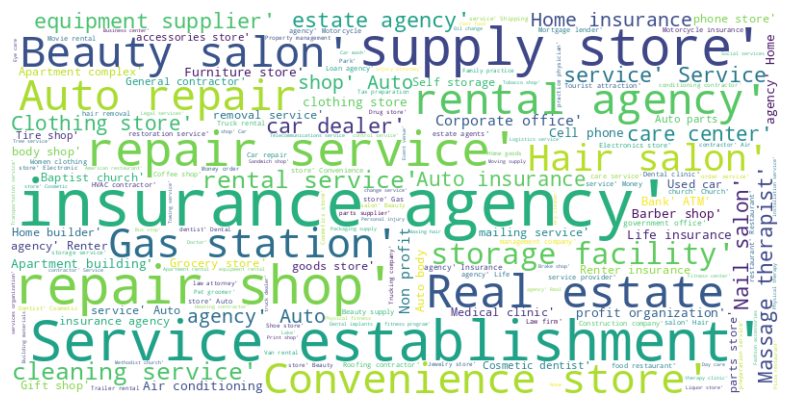

In [ ]:
# Crear nube de palabras para encontrar palabras representativas de cada categoria y en base a eso elegir las palabras  relacionadas con el rubro gastronomico

# Concatenar todos los textos en un solo string
texto_completo=' '.join(google_sitios['category'])

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_completo)

# Mostrar la nube de palabras usando Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# OBSERVACIONES: No se encuentran a simple vistas palabras relacionadas al sector gastronomico

In [ ]:
google_sitios['category'].head(30)

0                                            'Pharmacy'
1                                    'Textile exporter'
2                                   'Korean restaurant'
3                                        'Fabric store'
4                                        'Fabric store'
5                                        'Fabric store'
6                                          'Restaurant'
7           'Nail salon', 'Waxing hair removal service'
8                    'Bakery', 'Health food restaurant'
9         'Greeting card shop', 'Service establishment'
10       'Dentist', 'Cosmetic dentist', 'Dental clinic'
11          'Auto glass shop', 'Window tinting service'
12                                       'Beauty salon'
13     'Ski rental service', 'Snowboard rental service'
14                                   'Corporate office'
15    'Massage spa', 'Chiropractor', 'Massage', 'Mas...
16                  'Paint store', 'Paint manufacturer'
17                                  'Massage the

In [ ]:
# Palabras realacionadas con el sector gastronomico generadas por chat gpt

# Prompt: "Chat generame palabras en inglés relacionadas con el sector gastronomico tales como restaurant, bar, coffee, puede utilizar dichas palabras. Genera un maximo de 500 palabras"

palabras_gastronomicas = [
    'restaurant', 'bar', 'coffee', 'cafe', 'cuisine', 'chef', 'menu', 'food', 'dish', 'drink',
    'cook', 'recipe', 'culinary', 'taste', 'flavor', 'dining', 'gourmet', 'bistro', 'pub',
    'brewery', 'grill', 'bakery', 'deli', 'sushi', 'pizzeria', 'fast food', 'snack', 'dessert',
    'beverage', 'wine', 'beer', 'cocktail', 'juice', 'spice', 'organic', 'farm-to-table',
    'locally sourced', 'fusion', 'vegetarian', 'vegan', 'gluten-free', 'buffet', 'catering',
    'patio', 'reservation', 'ambiance', 'culinary school', 'foodie', 'gastronomy', 'tasting',
    'savor', 'savory', 'aroma', 'pastry', 'garnish', 'fine dining', 'diner', 'serving',
    'seasoning', 'culinary arts', 'kitchen', 'tableware', 'buffet', 'grill', 'sauce', 'appetizer',
    'entree', 'dessert', 'culinary experience', 'bake', 'roast', 'spice', 'savor', 'tasting menu',
    'farm fresh', 'local produce', 'sustainable', 'dine-in', 'takeout', 'food truck', 'eatery',
    'culinary journey', 'gastropub', 'delicious', 'yummy', 'mouthwatering', 'craving', 'satisfying',
    'refreshing', 'hearty', 'flavorful', 'tasty', 'mouthful', 'epicurean', 'nosh', 'feast',
    'gourmand', 'tantalizing', 'palate', 'delectable', 'savory', 'zing', 'gastronome', 'delightful',
    'mouth-watering', 'gustatory', 'pungent', 'exquisite', 'cuisiner', 'piquant', 'zingy', 'mouthfeel',
    'spicy', 'appetizing', 'succulent', 'toothsome', 'flavor profile', 'umami', 'zest', 'tangy', 'crispy',
    'tender', 'juicy', 'rich', 'creamy', 'smoky', 'decadent', 'piping hot', 'artisanal', 'sizzling', 'zingy',
    'exotic', 'refreshing', 'sophisticated', 'culinary delight', 'flavor burst', 'hearty', 'mouth-coating',
    'indulgent', 'spicy kick', 'luscious', 'taste explosion', 'zesty', 'crunchy', 'fragrant', 'zippy',
    'sweet and savory', 'crave-worthy', 'gustatory pleasure', 'sumptuous', 'exquisite', 'picnic', 'seasonal',
    'farmers market', 'barbecue', 'picnic', 'al fresco', 'fusion cuisine', 'culinary magic', 'bountiful', 'grilled',
    'raw', 'authentic', 'freshly baked', 'culinary artistry', 'food pairing', 'mouth-filling', 'crafted', 'infused',
    'traditional', 'modern', 'homemade', 'classic', 'exotic', 'dolce', 'crust', 'infusion', 'artisan', 'artisanal',
    'decadence', 'fusion', 'gastronomic adventure', 'bake-off', 'culinary genius', 'tasty treat', 'culinary affair',
    'culinary craft', 'gastronomic journey', 'culinary connoisseur', 'culinary ecstasy', 'gastronomic pleasure',
    'mouthwatering sensation', 'tantalizing aroma', 'culinary exploration', 'gourmet delight', 'culinary delight',
    'gastronomic treat', 'flavor symphony', 'taste sensation', 'culinary creation', 'culinary exploration', 'food lover'
]


In [ ]:
# Filtrar las filas que contienen palabras clave gastronómicas
serie_gastronomica = google_sitios['category'][google_sitios['category'].str.contains('|'.join(palabras_gastronomicas), case=False, na=False)]
# Mostrar la serie resultante
serie_gastronomica
# OBSERVACION: Se encontraron 26524 registros que contienen datos referidos al sector gastronomico


2                                       'Korean restaurant'
6                                              'Restaurant'
8                        'Bakery', 'Health food restaurant'
32                                   'Beverage distributor'
36                                       'Delivery service'
                                ...                        
274959                                        'Barber shop'
274962    'Ramen restaurant', 'Japanese restaurant', 'Re...
274964                                   'Ramen restaurant'
274966                                               'Cafe'
274999    'Building materials store', 'Electrical supply...
Name: category, Length: 26524, dtype: object

##*Lectura de datos - "Google maps-reviews-estados"*
---


In [ ]:
# Lectura de datos
ruta_reviews_estados='/content/drive/MyDrive/Proyecto Final/Google Maps/reviews-estados/review-California/1.json' # reseñas del estado de California
reviews_california=pd.read_json(ruta_reviews_estados,lines=True)
reviews_california

user_id                  name           time  rating  \
0       1.089912e+20               Song Ro  1609909927056       5   
1       1.112903e+20           Rafa Robles  1612849648663       5   
2       1.126404e+20             David Han  1583643882296       4   
3       1.174403e+20           Anthony Kim  1551938216355       5   
4       1.005808e+20         Mario Marzouk  1494910901933       5   
...              ...                   ...            ...     ...   
149995  1.081939e+20  Raffi Khatchadourian  1583646462958       5   
149996  1.075762e+20     Noah Vincent Ford  1605055631573       5   
149997  1.008113e+20        David Karwaski  1597443113544       5   
149998  1.177078e+20       Reynalda Vargaz  1573479297751       5   
149999  1.089381e+20             Omid Hass  1601598200197       5   

                                                    text  pics  resp  \
0                           Love there korean rice cake.  None  None   
1                                         Good very good  None  None   
2       They make Korean traditional food very properly.  None  None   
3                         Short ribs are very delicious.  None  None   
4           Great food and prices the portions are large  None  None   
...                                                  ...   ...   ...   
149995                                              None  None  None   
149996                                              None  None  None   
149997                                              None  None  None   
149998                                              None  None  None   
149999                                              None  None  None   

                                      gmap_id  
0       0x80c2c778e3b73d33:0xbdc58662a4a97d49  
1       0x80c2c778e3b73d33:0xbdc58662a4a97d49  
2       0x80c2c778e3b73d33:0xbdc58662a4a97d49  
3       0x80c2c778e3b73d33:0xbdc58662a4a97d49  
4       0x80c2c778e3b73d33:0xbdc58662a4a97d49  
...                                       ...  
149995  0x80c299484c7709cd:0x89510434231b14d4  
149996  0x80c299484c7709cd:0x89510434231b14d4  
149997  0x80c299484c7709cd:0x89510434231b14d4  
149998  0x80c299484c7709cd:0x89510434231b14d4  
149999  0x80c299484c7709cd:0x89510434231b14d4  

[150000 rows x 8 columns]

## Conclusiones

- Elegir rubro de negocio con el que trabajaremos, para definir KPI's adecuados
- Nececidad de ampliar información con datos de otras fuentes